# Fuzzy Logic dengan Python

NAMA  : Raden Ayu Tamara SN<br>
NIM   : 09011181722007<br>
KELAS : SK5A<br>
MK    : KECERDASAN BUATAN<br>

Sumber:<br>
https://ojs.unpkediri.ac.id/index.php/ti/article/view/246

<div style="text-align: justify">SDN Sonopatik 1 Nganjuk adalah sebuah instansi pendidikan yang sudah berdiri sejak tahun 1972, sekarang memiliki dua kelas yaitu kelas biasa dan kelas khusus, kelas biasa dimaksudkan untuk anak yang memenuhi syarat akademis dan kelas khusus yang dimaksudkan untuk anak yang tidak memenuhi persyaratan akademis.
 Teknologi pendaftaran khususnya dalam memilah data murid memerlukan adanya sebuah sistem pendukung keputusan (SPK) yang bisa memilah data secara otomatis ketika ada data yang di masukkan. Sistem pendukung keputusan selalu membutuhkan metode yang tepat. Fuzzy banyak digunakan dalam pendukung pengambilan keputusan. 


Pada bagian ini menjelaskan tentang perancangan dari sistem fuzzy yang akan digunakan untuk proses penerimaan siswa baru. Secara garis besar, proses penerimaan siswa baru pada sistem yang akan dibangun diawali dengan pengisian data siswa dan data nilai dan hasil tes dari siswa yang kemudian akan di proses oleh fuzzy untuk menghasilkan nilai output yang menjadi nilai akhir siswa masuk kelas mana.

Input :
Umur dibagi menjadi 3 bagian yakni :
- Kurang (2 - 6 Tahun)
- Cukup (4 - 8 Tahun)
- Lebih (6 - 10 Tahun)

Nilai dibagi menjadi 3 bagian yakni:
- Kurang (0 - 40)
- Cukup (20 - 60)
- Bagus (80 - 100)

Output : 
Kelas yang dibagi menjadi 2 bagian yakni :
- Biasa (0 - 60)
- Khusus (50 - 100)

### Mengimpor library untuk fuzzy
Library yang akan digunakan adalah numpy, skfuzzy, dan matplotlib.pyplot. Selain itu kita juga menggunakan fungsi control dari library skfuzzy.

In [7]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Fuzzyfikasi

### Menentukan variabel input

Data umur dan nilai untuk program pendaftaran siswa baru yang akan di buat.

In [30]:
umur = ctrl.Antecedent(np.arange(1,11,1),'umur')
nilai = ctrl.Antecedent(np.arange(0,100,1),'nilai')

### Menentukan variabel output

Pada bagian pengelompokan kelas untuk siswa baru dengan acuan nilai sekolah

In [31]:
kelas = ctrl.Consequent(np.arange(0,101,1),'kelas')

### Nilai Linguistik

a. Nilai Linguistik pada Variabel Umur ada 3, yaitu:

- Umur kurang
$$ Umur Kurang(x)=
\begin{cases}
    0, & \text{$x\leq 2$ atau $x\geq6$}.\\
    (x - 2)/(4 - 6) , & \text{$2 \leq x \leq 4$}.\\
    (6 - x)/(6 - 4) , & \text{$4\leq x \leq 6$ }.\\
  \end{cases}
$$

- umur cukup 
$$ Umur Cukup(x)=
\begin{cases}
    0, & \text{$x\leq 4$ atau $x\geq8$}.\\
    (x - 4)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    (8 - x)/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
$$
 
- umur Lebih
$$ Umur Lebih(x)=
\begin{cases}
    0, & \text{$x\leq 6$ atau $x\geq10$}.\\
    (x - 6)/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
    (10 - x)/(10 - 8) , & \text{$8 \leq x \leq 10$}.\\
  \end{cases}
$$

b. Nilai Linguistik pada Variabel Nilai ada 3, yaitu:

- Nilai kurang 
$$ Nilai Kurang(x)=
\begin{cases}
    0, & \text{$x\leq 20$ atau $x \geq60$}.\\
    \left.(x - 20) \,  \right/(40 - 20) , & \text{$20 \leq x \leq 40$}.\\
    \left.(60 - x) \,  \right/(60 - 40) , & \text{$40 \leq x \leq 60$}.\\
  \end{cases}
$$

- Nilai cukup
$$ Nilai Cukup(x)=
\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq80$}.\\
    \left.(x - 40)\, \right/(60 - 40) , & \text{$40 \leq x \leq 60$}.\\
    \left.(80 - x)\, \right/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
  \end{cases}
$$

- Nilai Bagus
$$ Nilai Bagus(x)=
\begin{cases}
    0, & \text{$x\leq 60$ atau $x\geq100$}.\\
    \left.(x - 60) \,  \right/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    \left.(100 - x)\, \right/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
  \end{cases}
$$

## Generate fuzzy membership functions

Menentukan fungsi keanggotaan artinya mendefinisikan himpunan fuzzy dengan memetakan masukan crisp dari domainnya, ke derajat keanggotaan.

In [10]:
umur['kurang'] = fuzz.trimf(umur.universe,[2,4,6])
umur['cukup'] = fuzz.trimf(umur.universe,[4,6,8])
umur['lebih'] = fuzz.trimf(umur.universe,[6,8,10])

nilai['kurang'] = fuzz.trimf(nilai.universe,[20,40,60])
nilai['cukup'] = fuzz.trimf(nilai.universe,[40,60,80])
nilai['bagus'] = fuzz.trimf(nilai.universe,[60,80,100])

kelas['biasa'] = fuzz.trimf(kelas.universe,[0,30,60])
kelas['khusus'] = fuzz.trimf(kelas.universe,[20,70,100])

### Menampilkan Grafik Fungsi Keanggotaan

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


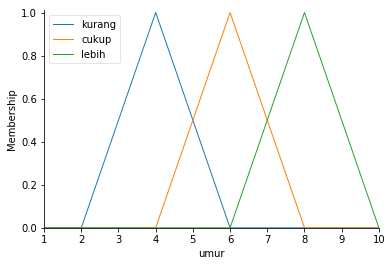

In [11]:
umur.view()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


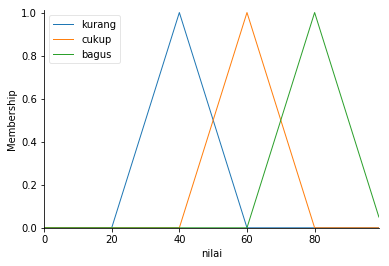

In [12]:
nilai.view()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


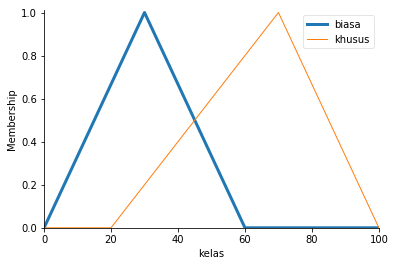

In [13]:
kelas["biasa"].view()

## Rule Base

In [14]:
rule1 = ctrl.Rule(umur['kurang']& nilai['bagus'], kelas['biasa'])
rule2 = ctrl.Rule(umur['kurang']& nilai['cukup'], kelas['biasa'])
rule3 = ctrl.Rule(umur['kurang']& nilai['kurang'], kelas['khusus'])
rule4 = ctrl.Rule(umur['cukup']& nilai['bagus'], kelas['biasa'])
rule5 = ctrl.Rule(umur['cukup']& nilai['cukup'], kelas['biasa'])
rule6 = ctrl.Rule(umur['cukup']& nilai['kurang'], kelas['khusus'])
rule7 = ctrl.Rule(umur['lebih']& nilai['bagus'], kelas['biasa'])
rule8 = ctrl.Rule(umur['lebih']& nilai['cukup'], kelas['biasa'])
rule9 = ctrl.Rule(umur['lebih']& nilai['kurang'], kelas['khusus'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25071bb7898>)

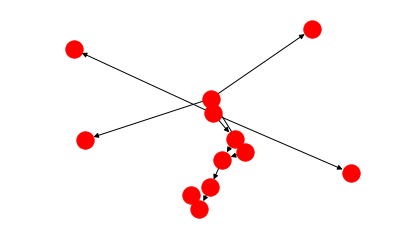

In [15]:
rule1.view()

# DEFUZZIFIKASI

Menggunakan mode simulasi

In [16]:
simulasi_kelas = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
prediksi_kelas = ctrl.ControlSystemSimulation(simulasi_kelas)

### Simulasi dengan memasukan nilai pada variabel input

In [17]:
prediksi_kelas.input['umur'] = 5
prediksi_kelas.input['nilai'] = 60

Karena di atas kita sudah melakukan proses fuzzyfikasi, selanjutnya kita akan cocokkan dengan perhitungan manualnya

In [18]:
prediksi_akhir = prediksi_kelas.compute()
prediksi_akhir = prediksi_kelas.output['kelas']
print ("Perhitungan hasil komputasi = %.3f" % prediksi_akhir)

Perhitungan hasil komputasi = 30.000


### Menampilkan grafik hasil Inferensi dan Defuzzyfikasi


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


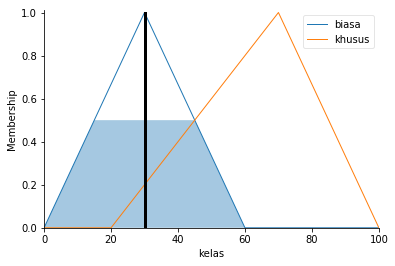

In [19]:
kelas.view(sim = prediksi_kelas)

# Perhitungan Manual

\begin{equation}
    Umur = 5 \\
    Masukkan\,nilai\,umur\,ke\,dalam\,masing-masing\,fungsi\,keanggotaan\,umur\\
  umur['kurang'] = \mu UmurKurang(x)=\begin{cases}
    0, & \text{$x\leq 2$ atau $x\geq6$}.\\
    (x - 2)/(4 - 6) , & \text{$2 \leq x \leq 4$}.\\
    (6 - x)/(6 - 4) , & \text{$4\leq x \leq 6$ }.\\
  \end{cases}
  \\
  umur['cukup'] = \mu UmurCukup(x)=\begin{cases}
    0, & \text{$x\leq 4$ atau $x\geq8$}.\\
    (x - 4)/(6 - 4) , & \text{$4 \leq x \leq 6$}.\\
    (8 - x)/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
  \end{cases}
  \\
    umur ['lebih'] = \mu UmurLebih(x)=\begin{cases}
    0, & \text{$x\leq 6$ atau $x\geq10$}.\\
    (x - 6)/(8 - 6) , & \text{$6 \leq x \leq 8$}.\\
    (10 - x)/(10 - 8) , & \text{$8 \leq x \leq 10$}.\\
  \end{cases}
\end{equation}



\begin{equation}
    \mu UmurKurang(5) = (6 - 5) / (6 - 4) \\
    \mu UmurKurang(5) = 1/2 \\ 
    \mu UmurKurang(5) = 0.5 \\
    \mu UmurCukup(5) = (5 - 4) / (6-4) \\
    \mu UmurCukup(5) = 1/2 \\
    \mu UmurCukup(5) = 0.5 \\
\end{equation}

\begin{equation}
   Nilai = 60 \\
  Nilai['kurang'] = \mu NilaiKurang(x)=\begin{cases}
    0, & \text{$x\leq 20$ atau $x \geq60$}.\\ 
    \left.(x - 20) \,  \right/(40 - 20) , & \text{$20 \leq x \leq 40$}.\\
    \left.(60 - x) \,  \right/(60 - 40) , & \text{$40 \leq x \leq 60$}.\\
  \end{cases}
  \\
    Nilai['cukup'] = \mu NilaiCukup(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq80$}.\\
    \left.(x - 40)\, \right/(60 - 40) , & \text{$40 \leq x \leq 60$}.\\
    \left.(80 - x)\, \right/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
  \end{cases}
  \\
  Nilai['Bagus'] = \mu NilaiBagus(x)=\begin{cases}
    0, & \text{$x\leq 60$ atau $x\geq100$}.\\
    \left.(x - 60) \,  \right/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    \left.(100 - x)\, \right/(100 - 80) , & \text{$80 \leq x \leq 100$}.\\
  \end{cases}
\end{equation}

\begin{equation}
 \mu NilaiCukup(x) = 1
\end{equation}

## Hasil defuzzifikasi dari python diatas

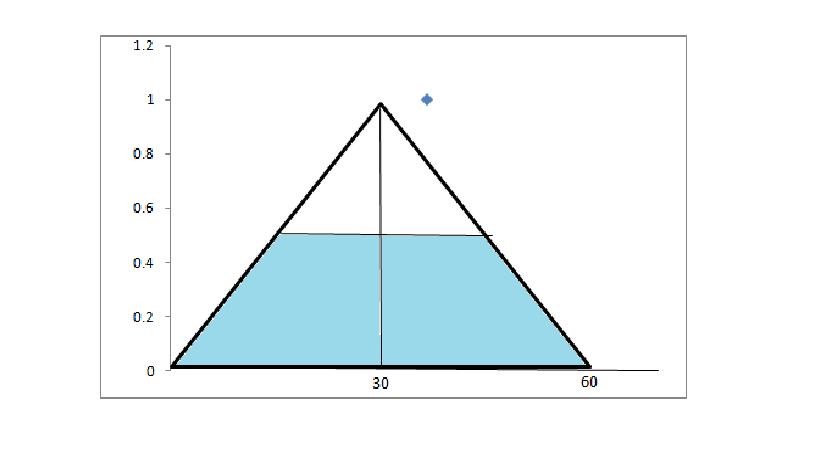

## Perhitungan

Mencari nilai a dan b

$$
0,5 = \frac{a - 0}{30 - 0}
$$

$$
0,5 x 30 = a
$$

$$
a = 15
$$

$$
0,5 = \frac{60 - b}{60 - 30}
$$

$$
0,5x30 = 60 - b
$$

$$
b = 45
$$

Menghitung X1 X2 dan X3

- X1

$$
X1 = \frac{2 x (15-0)}{3}  
$$

$$
= 10
$$

- X2

$$
X2 = \frac{(15+45)}{2}  
$$

$$
= 30
$$

- X3

$$
X3 = 45 + \frac{(45 - 15)}{3}  
$$

$$
= 45 + 10
$$

$$
= 55
$$

Menghitung luas area (A)

- A1

$$
A1 = \frac{(15 - 0) x 0.5}{2}  
$$

$$
= 3.75
$$

- A2

$$
A2 = (45 - 15) x 0.5  
$$

$$
= 15
$$

- A3

$$
A3 = \frac{(60 - 45) x 0.5}{2}  
$$

$$
= 3.75
$$

Dari sini kita dapat mencari nilai defuzzifikasi, yaitu :

$$
Z^* = \frac{(X1 x A1) + (X2 x A2) + (X3 x A3)}{A1 + A2 A3}
$$

$$
= \frac{(10 x 3.75) + (30 x 15) + (55 x 3.75)}{3.75 + 15 + 3.75}
$$

$$
= \frac{37.5 + 450 + 206.25}{22.5}
$$

$$
= 30.83333
$$

Hasil output yang dikeluarkan menggunakan code python sebesar 30.00 sedangkan perhitungan manual sebesar 30,833 .
Terdapat perbedaan sebesar 0.833 detik